<a href="https://colab.research.google.com/github/mazenbuk/intern/blob/main/baruu4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lung Cancer Prediction**

*Kelompok 9:*


*   Muhammad Arsya Zain Yashifa - TIF 22
*   Jennifer Leonardi - SI 23

## **Theme, Dataset, and Business Understanding**






### **1. Background**

Lung cancer is a disease characterized by the growth of abnormal cells in the lungs. These abnormal cells can develop into tumors that can interfere with lung function and spread to other parts of the body.

The impacts of Lung Cancer: High mortality rate, lung cancer can progress rapidly and often does not show symptoms in the early stages. Lung cancer can cause various symptoms that interfere with the patient's quality of life, and also requires high costs, including surgery, chemotherapy, and radiation.

Lung cancer is the leading cause of cancer death worldwide, accounting for 1.59 million deaths in 2018. According to Globocan data 2020, there were 32,788 new cases and 28,815 deaths from lung cancer in Indonesia

### **2. Objectives**



1.   Identification of factors leading to Lung Cancer
2.   Creating a model to predict Lung Cancer based on conditions
1.   Predicting the likelihood of a patient developing lung cancer
2.   Determining the most effective treatment for a patient with lung cancer




### **3. Dataset**

Title: Cancer Patients Dataset

Source: Kaggle

Link: https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link/data

### **4. Dataset Attributes**

* **Age**: The age of the patient. (Numeric)
* **Gender**: The gender of the patient. (Categorical)
* **Air Pollution**: The level of air pollution exposure of the patient. (Categorical)
* **Alcohol use**: The level of alcohol use of the patient. (Categorical)
* **Dust Allergy**: The level of dust allergy of the patient. (Categorical)
* **OccuPational Hazards**: The level of occupational hazards of the patient. (Categorical)
* **Genetic Risk**: The level of genetic risk of the patient. (Categorical)
* **chronic Lung Disease**: The level of chronic lung disease of the patient. (Categorical)
* **Balanced Diet**: The level of balanced diet of the patient. (Categorical)
* **Obesity**: The level of obesity of the patient. (Categorical)
* **Smoking**: The level of smoking of the patient. (Categorical)
* **Passive Smoker**: The level of passive smoker of the patient. (Categorical)
* **Chest Pain**: The level of chest pain of the patient. (Categorical)
* **Coughing of Blood**: The level of coughing of blood of the patient. (Categorical)
* **Fatigue**: The level of fatigue of the patient. (Categorical)
* **Weight Loss**: The level of weight loss of the patient. (Categorical)
* **Shortness of Breath**: The level of shortness of breath of the patient. (Categorical)
* **Wheezing**: The level of wheezing of the patient. (Categorical)
* **Swallowing Difficulty**: The level of swallowing difficulty of the patient. (Categorical)
* **Clubbing of Finger Nails**: The level of clubbing of finger nails of the patient. (Categorical)

## **EDA and Analysis**

### **1. Loading Dataset**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import math

In [2]:
data = pd.read_csv('https://raw.github.com/mazenbuk/intern/main/cancer%20patient%20data%20sets.csv')

In [3]:
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
data.tail()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
999,999,P999,47,1,6,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High


### **2. Data Understanding**

In [5]:
# Mengetahui jumlah baris dan kolom
data.shape

(1000, 26)

In [6]:
# Mengetahui tipe data tiap kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [7]:
# Distribusi data
data.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


### **3. Data Visualization and Preprocessing**

In [8]:
# Mengecek data kosong
data.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [9]:
# Mengecek data duplikat
data.duplicated().sum()

0

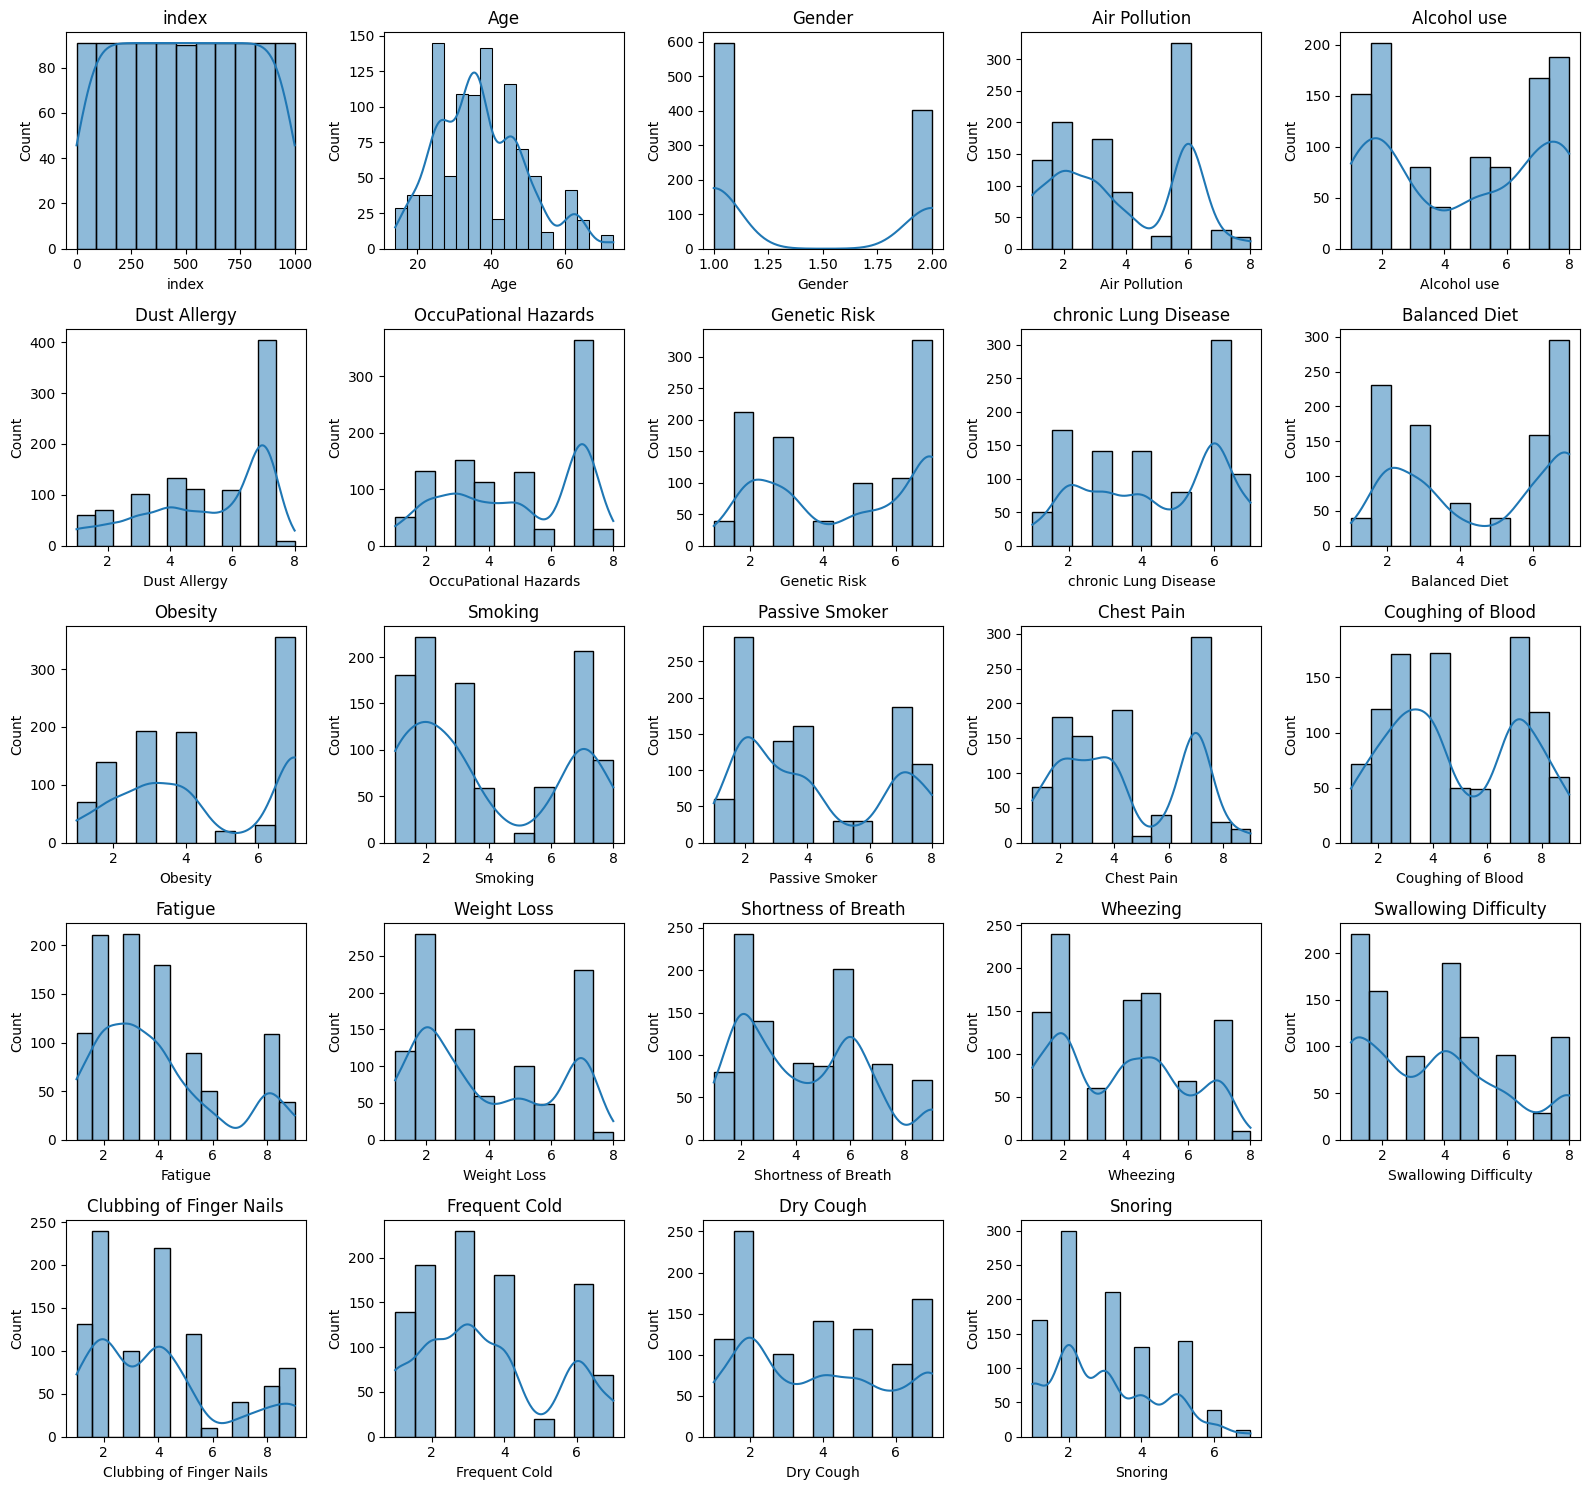

In [10]:
# Melihat distribusi data
data_numeric = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(16, 15))
for i, col in enumerate(data_numeric.columns, 1):
    plt.subplot(5, 5, i)
    sns.histplot(data_numeric[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

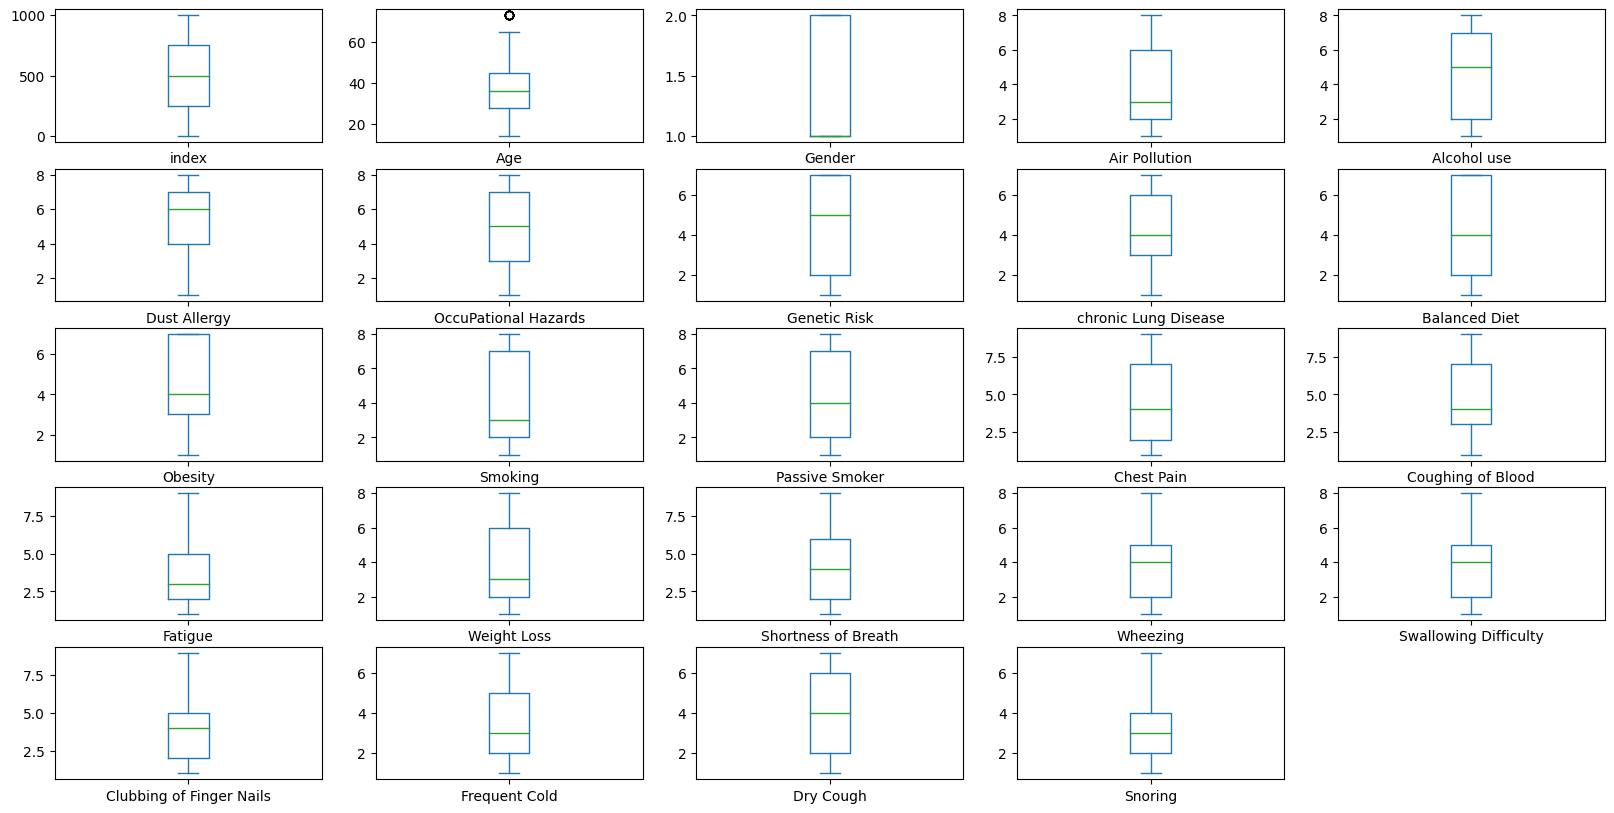

In [11]:
# Mendeteksi outliers menggunakan boxplot
data.plot(kind='box', layout=(5,5), figsize=(20,10), subplots=True, sharex=False, sharey=False)
plt.show()

In [12]:
# Menghapus kolom yang tidak diperlukan
data = data.drop(columns=['index', 'Patient Id'], axis=1)

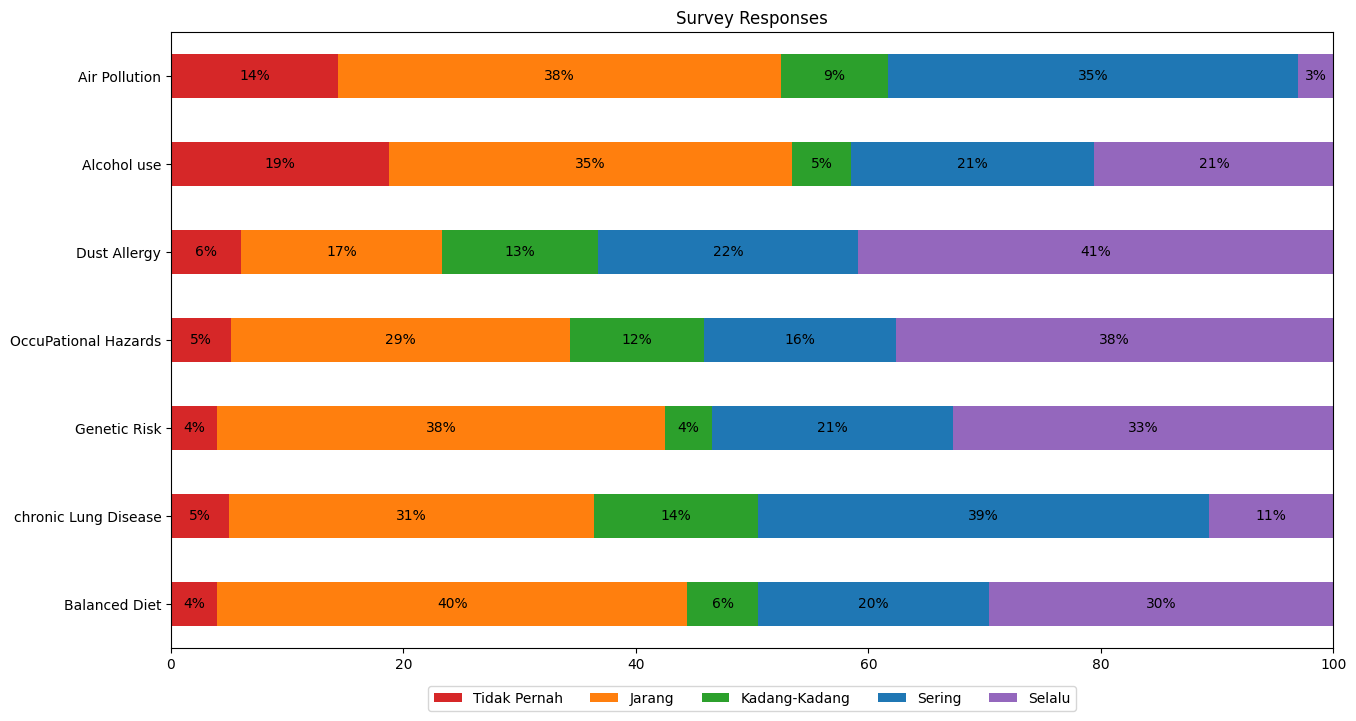

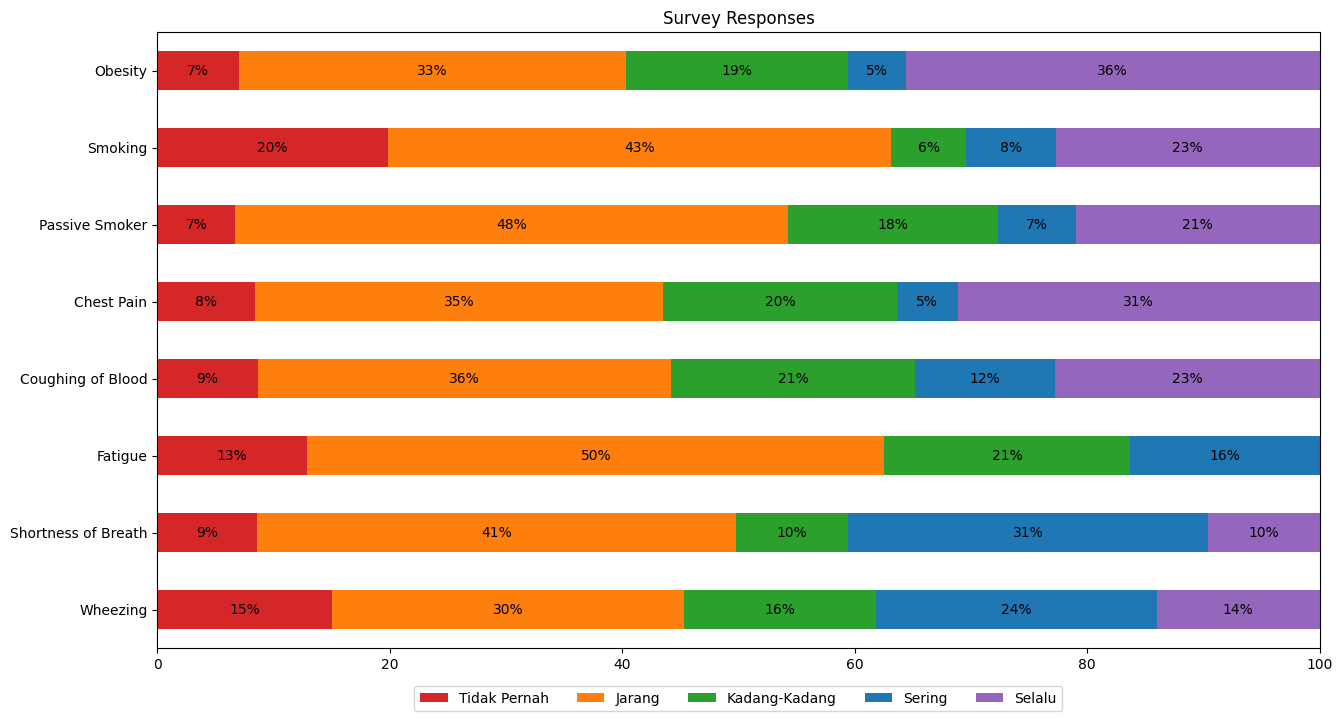

In [13]:
# Likert Chart
scale_mappings = {
    1: 'Tidak Pernah',
    2: 'Jarang', 3: 'Jarang',
    4: 'Kadang-Kadang',
    5: 'Sering', 6: 'Sering',
    7: 'Selalu'
}

columns_drop = ['Age', 'Gender', 'Level', 'Weight Loss', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring']

columns = [col for col in data.columns if col not in columns_drop]

mid_index = len(columns) // 2
first_half_columns = columns[:mid_index]
second_half_columns = columns[mid_index:]

first_half_data = data[first_half_columns].applymap(lambda x: scale_mappings.get(x, None))
first_half_counts = first_half_data.apply(lambda x: x.value_counts(normalize=True)).T * 100

second_half_data = data[second_half_columns].applymap(lambda x: scale_mappings.get(x, None))
second_half_counts = second_half_data.apply(lambda x: x.value_counts(normalize=True)).T * 100

ordered_categories = ['Tidak Pernah', 'Jarang', 'Kadang-Kadang', 'Sering', 'Selalu']
first_half_counts = first_half_counts[ordered_categories]
second_half_counts = second_half_counts[ordered_categories]

def plot_likert_scale(likert_counts):
    fig, ax = plt.subplots(figsize=(15, 8))
    likert_counts.plot(kind='barh', stacked=True,
                       color=['#d62728', '#ff7f0e', '#2ca02c', '#1f77b4', '#9467bd'], ax=ax)
    plt.title('Survey Responses')
    plt.xlim(0, 100)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(likert_counts.columns))

    for n, x in enumerate([*likert_counts.index.values]):
        for (proportion, count, y_loc) in zip(likert_counts.loc[x],
                                              likert_counts.loc[x].cumsum(),
                                              likert_counts.loc[x].cumsum() - likert_counts.loc[x] / 2):
            if proportion > 0:
                ax.text(y_loc, n, f'{proportion:.0f}%', ha='center', va='center')

    ax.invert_yaxis()

    plt.show()

plot_likert_scale(first_half_counts)
plot_likert_scale(second_half_counts)

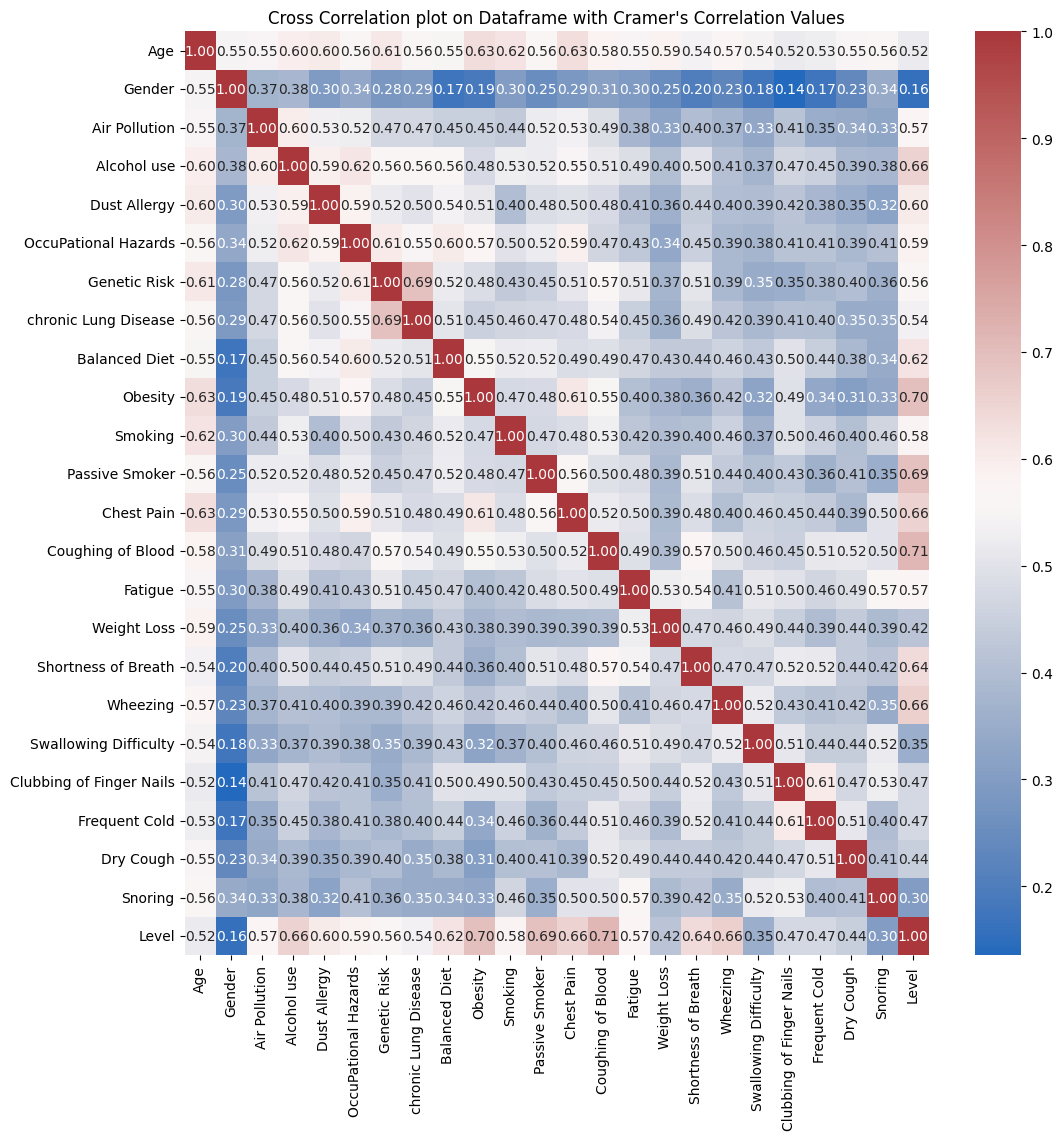

In [14]:
# Melihat korelasi antarfitur dengan metode Cramer
def cramerV(label,x):
    confusion_matrix = pd.crosstab(label, x)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r,k = confusion_matrix.shape
    phi2 = chi2/n
    phi2corr = max(0,phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r - 1) ** 2) / ( n - 1 )
    kcorr = k - ((k - 1) ** 2) / ( n - 1 )
    try:
        if min((kcorr - 1),(rcorr - 1)) == 0:
            v = 0
        else:
            v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
    except:
        v = 0
    return v

def plot_cramer(df):
    cramer = pd.DataFrame(index=df.columns,columns=df.columns)
    for column_of_interest in df.columns:
        try:
            temp = {}

            columns = df.columns
            for j in range(0,len(columns)):
                v = cramerV(df[column_of_interest],df[columns[j]])
                cramer.loc[column_of_interest,columns[j]] = v
                if (column_of_interest==columns[j]):
                    pass
                else:
                    temp[columns[j]] = v
            cramer.fillna(value=np.nan,inplace=True)
        except:
            print('Dropping row:',column_of_interest)
            pass
    plt.figure(figsize=(12,12))
    sns.heatmap(cramer,annot=True,fmt='.2f',cmap="vlag")

    plt.title("Cross Correlation plot on Dataframe with Cramer's Correlation Values")
    plt.show()

plot_cramer(data)

### **4. Analysis and Business Question**

**Univariate**

1. Bagaimana perbandingan jumlah pasien yang menderita kanker dengan resiko rendah, sedang, dan tinggi?

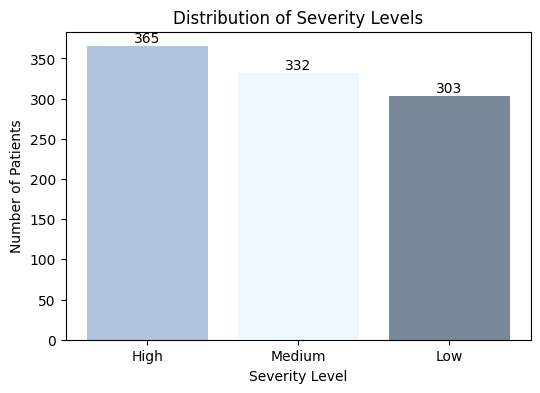

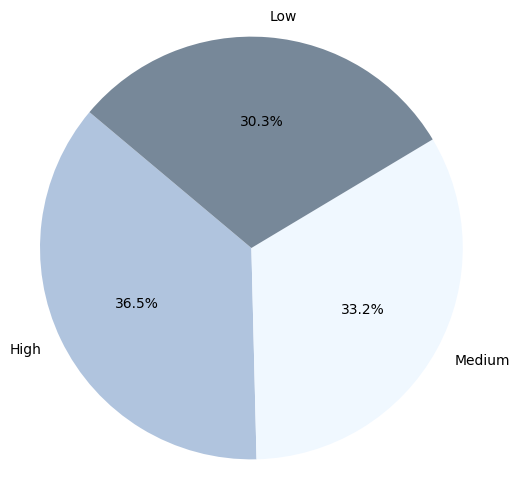

In [15]:
# Histogram
plt.figure(figsize=(6, 4))

level_counts = data['Level'].value_counts()
bars = plt.bar(level_counts.index, level_counts.values, color=['lightsteelblue', 'aliceblue', 'lightslategray'])

plt.title('Distribution of Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, yval, ha='center', va='bottom')

plt.show()

# Pie chart
labels = data['Level'].value_counts().index
sizes = data["Level"].value_counts().values
colors = ['lightsteelblue', 'aliceblue', 'lightslategray']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

2. Bagaimana distribusi nilai dari setiap kolom?

In [16]:
# Convert data categorical ke numerical
data['Level_numeric'] = data['Level'].map({'Low': 1, 'Medium': 2, 'High': 3})

<ipython-input-17-5491691e990e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette = sns.color_palette('vlag'))
<ipython-input-17-5491691e990e>:10: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette = sns.color_palette('vlag'))
<ipython-input-17-5491691e990e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette = sns.color_palette('vlag'))
<ipython-input-17-5491691e990e>:10: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, whi

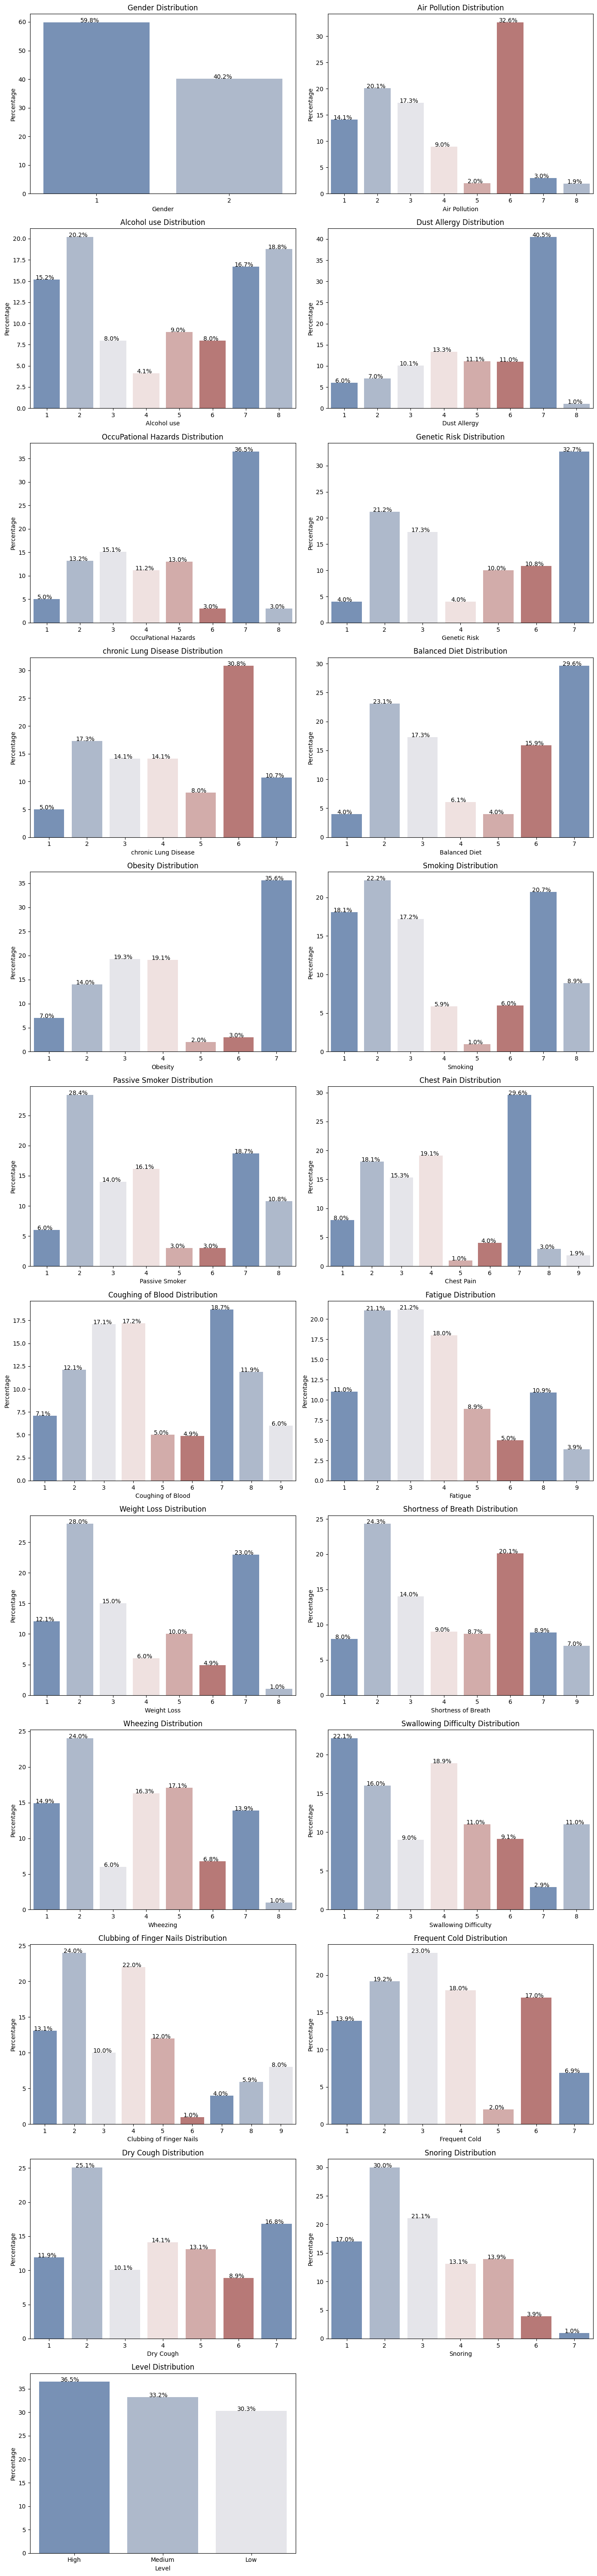

In [17]:
# Univariate Analysis
def plot_percentage_barplots(df, feature_names, n_cols=2, fig_width=14, fig_height=5):
    n_rows = (len(feature_names) + 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, n_rows * fig_height))
    axes = axes.flatten()

    for ax, feature in zip(axes, feature_names):
        value_counts = df[feature].value_counts(normalize=True) * 100

        sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette = sns.color_palette('vlag'))
        ax.set_title(f'{feature} Distribution')
        ax.set_ylabel('Percentage')
        ax.set_xlabel(feature)

        for p in ax.patches:
            percentage = '{:.1f}%'.format(p.get_height())
            x = p.get_x() + p.get_width() / 2 - 0.05
            y = p.get_y() + p.get_height()
            ax.annotate(percentage, (x, y), ha='center')

    for i in range(len(feature_names), n_rows * n_cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

categorical_features = [col for col in data.columns if data[col].nunique() < 10 and col not in ['index', 'Patient Id', 'Level_numeric']]
plot_percentage_barplots(data, categorical_features)

**Bivariate**

3. Bagaimana distribusi setiap features terhadap target (Level)

Distribusi Air Pollution terhadap Level

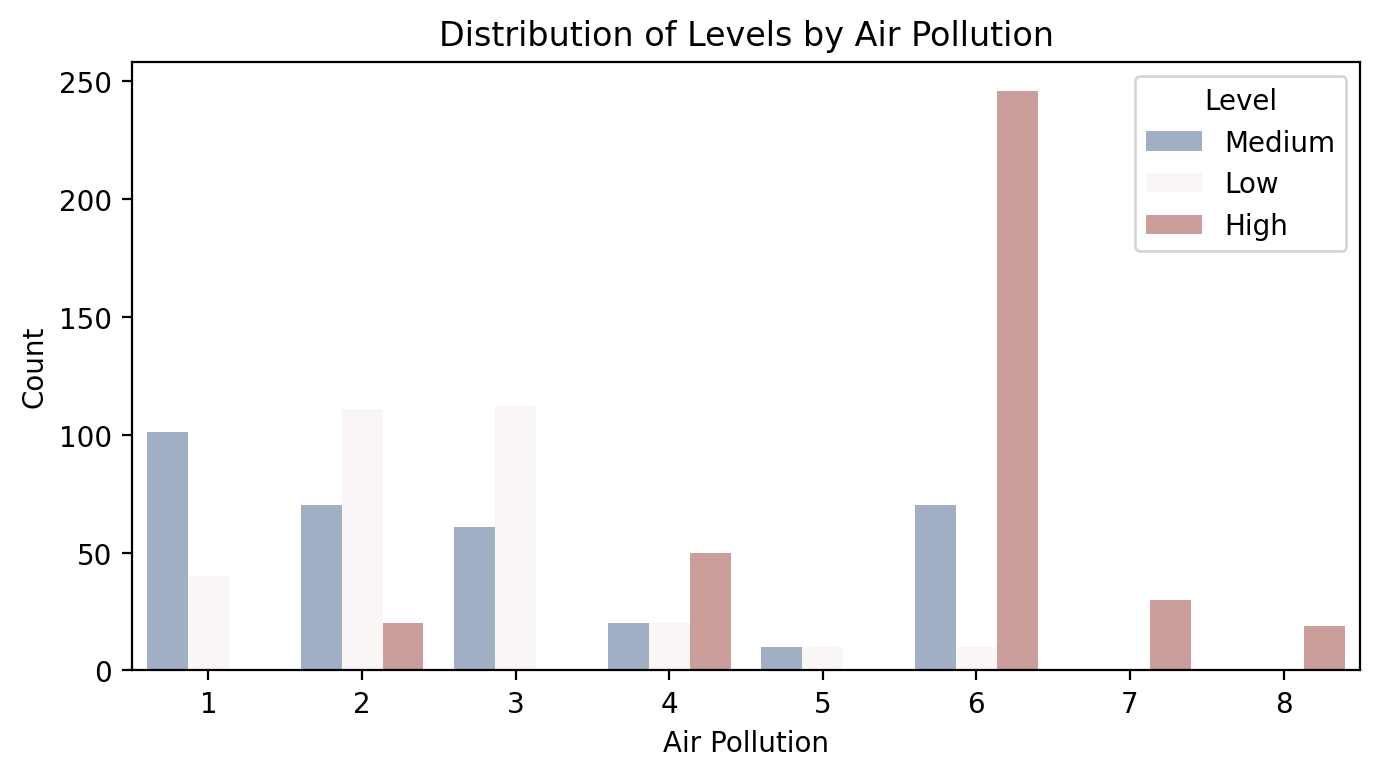

In [23]:
plt.figure(figsize=(7, 4))
sns.countplot(x='Air Pollution', hue='Level', data=data, palette='vlag')
plt.title('Distribution of Levels by Air Pollution')
plt.xlabel('Air Pollution')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

Distribusi Alcohol Use terhadap Level

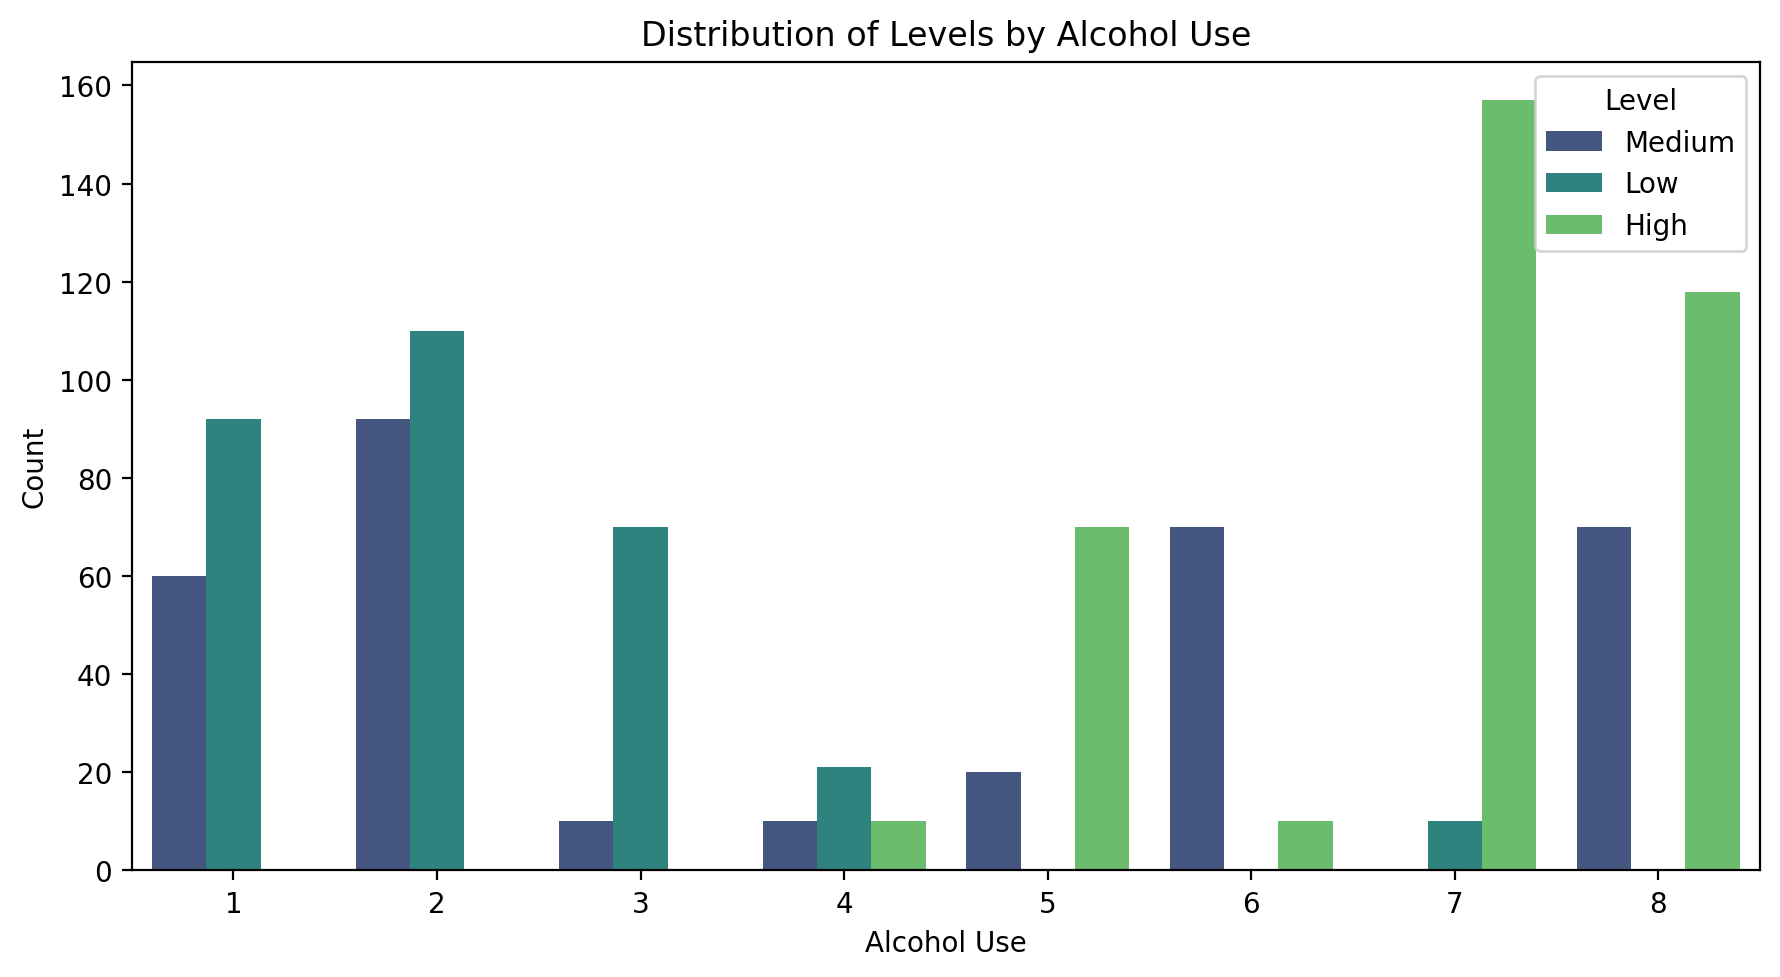

In [31]:
plt.figure(figsize=(9,5))
sns.countplot(x='Alcohol use', hue='Level', data=data, palette='viridis')
plt.title('Distribution of Levels by Alcohol Use')
plt.xlabel('Alcohol Use')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

Distribusi Dust Allergy terhadap Level

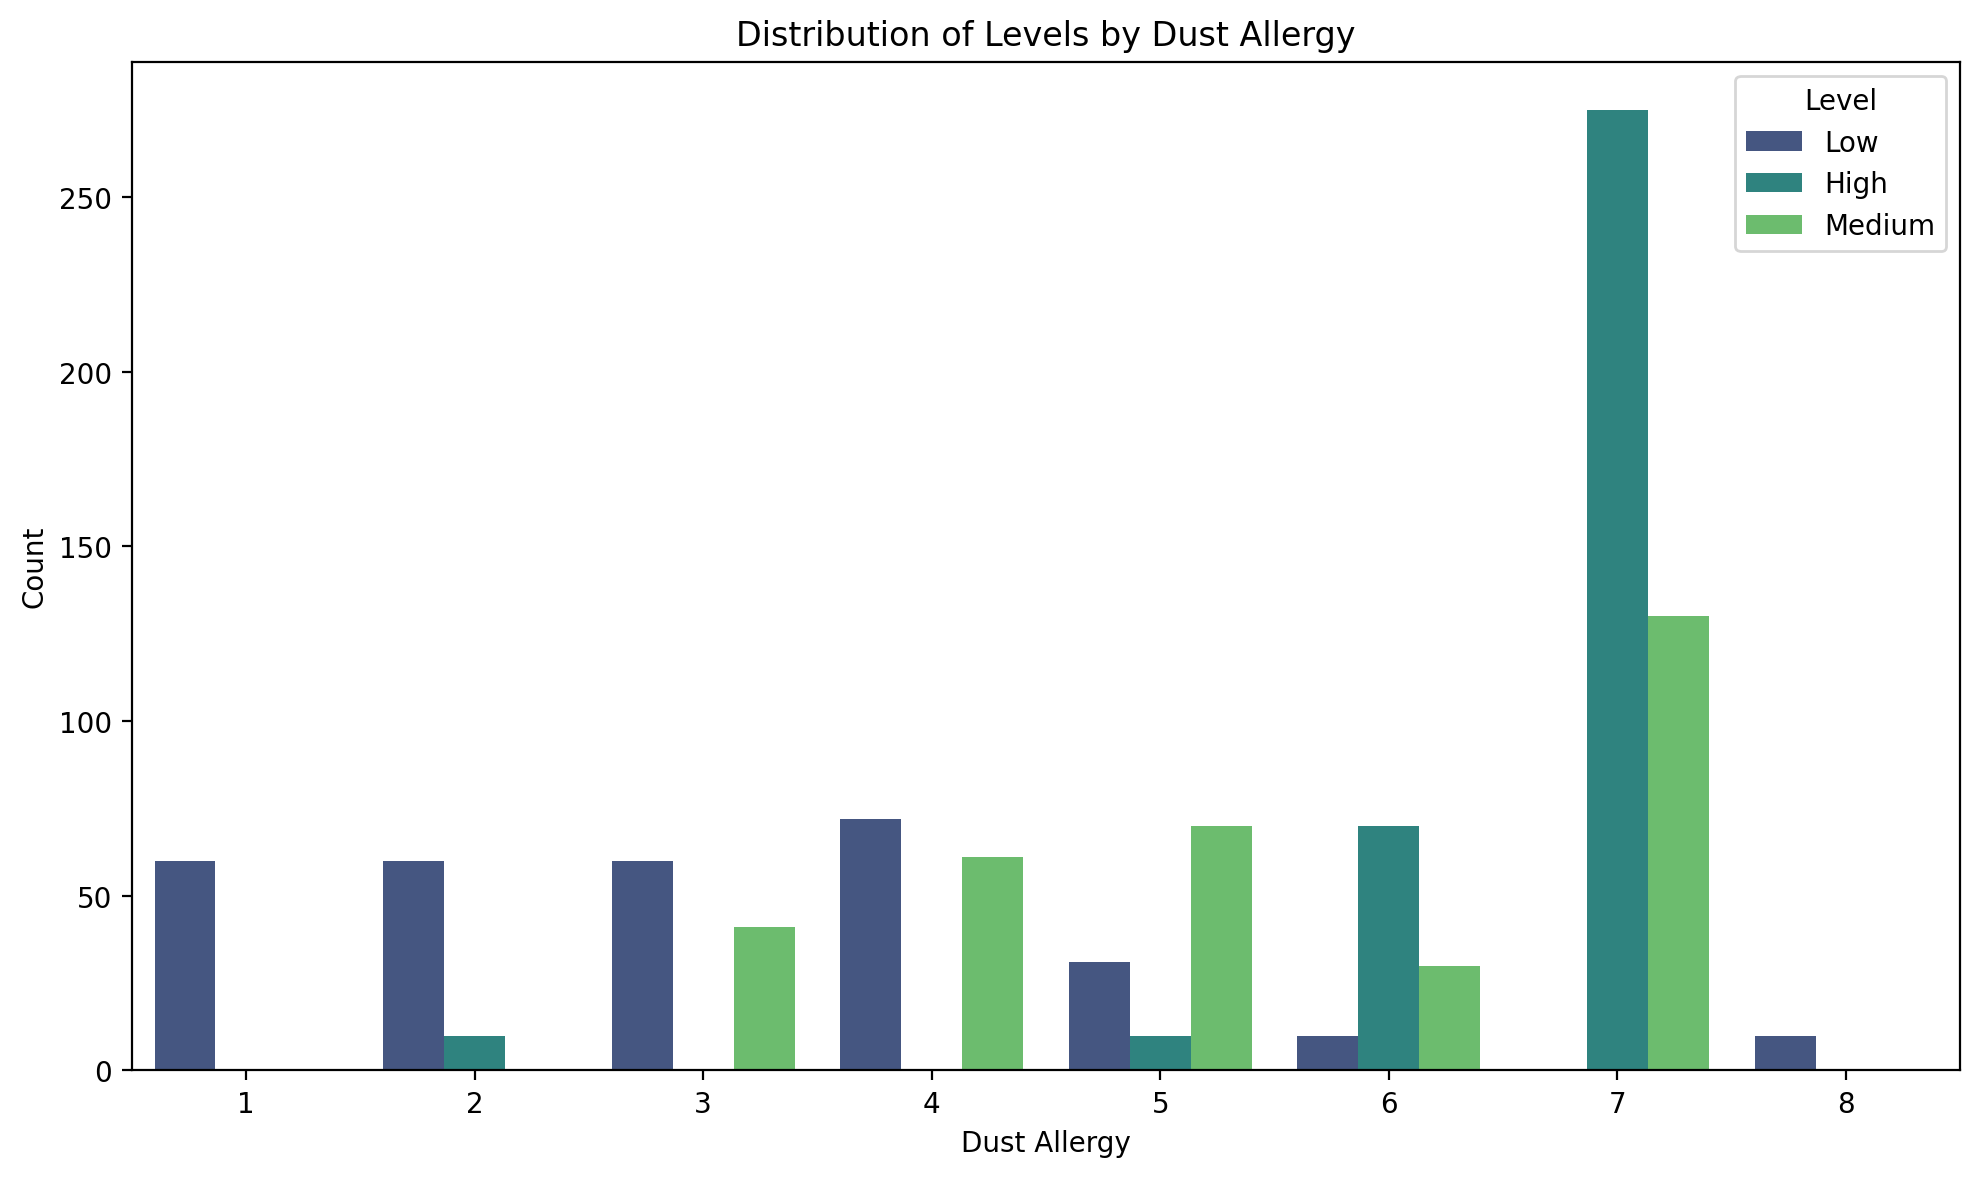

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Dust Allergy', hue='Level', data=data, palette='viridis')
plt.title('Distribution of Levels by Dust Allergy')
plt.xlabel('Dust Allergy')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

Distribusi Occupational Hazards terhadap Level

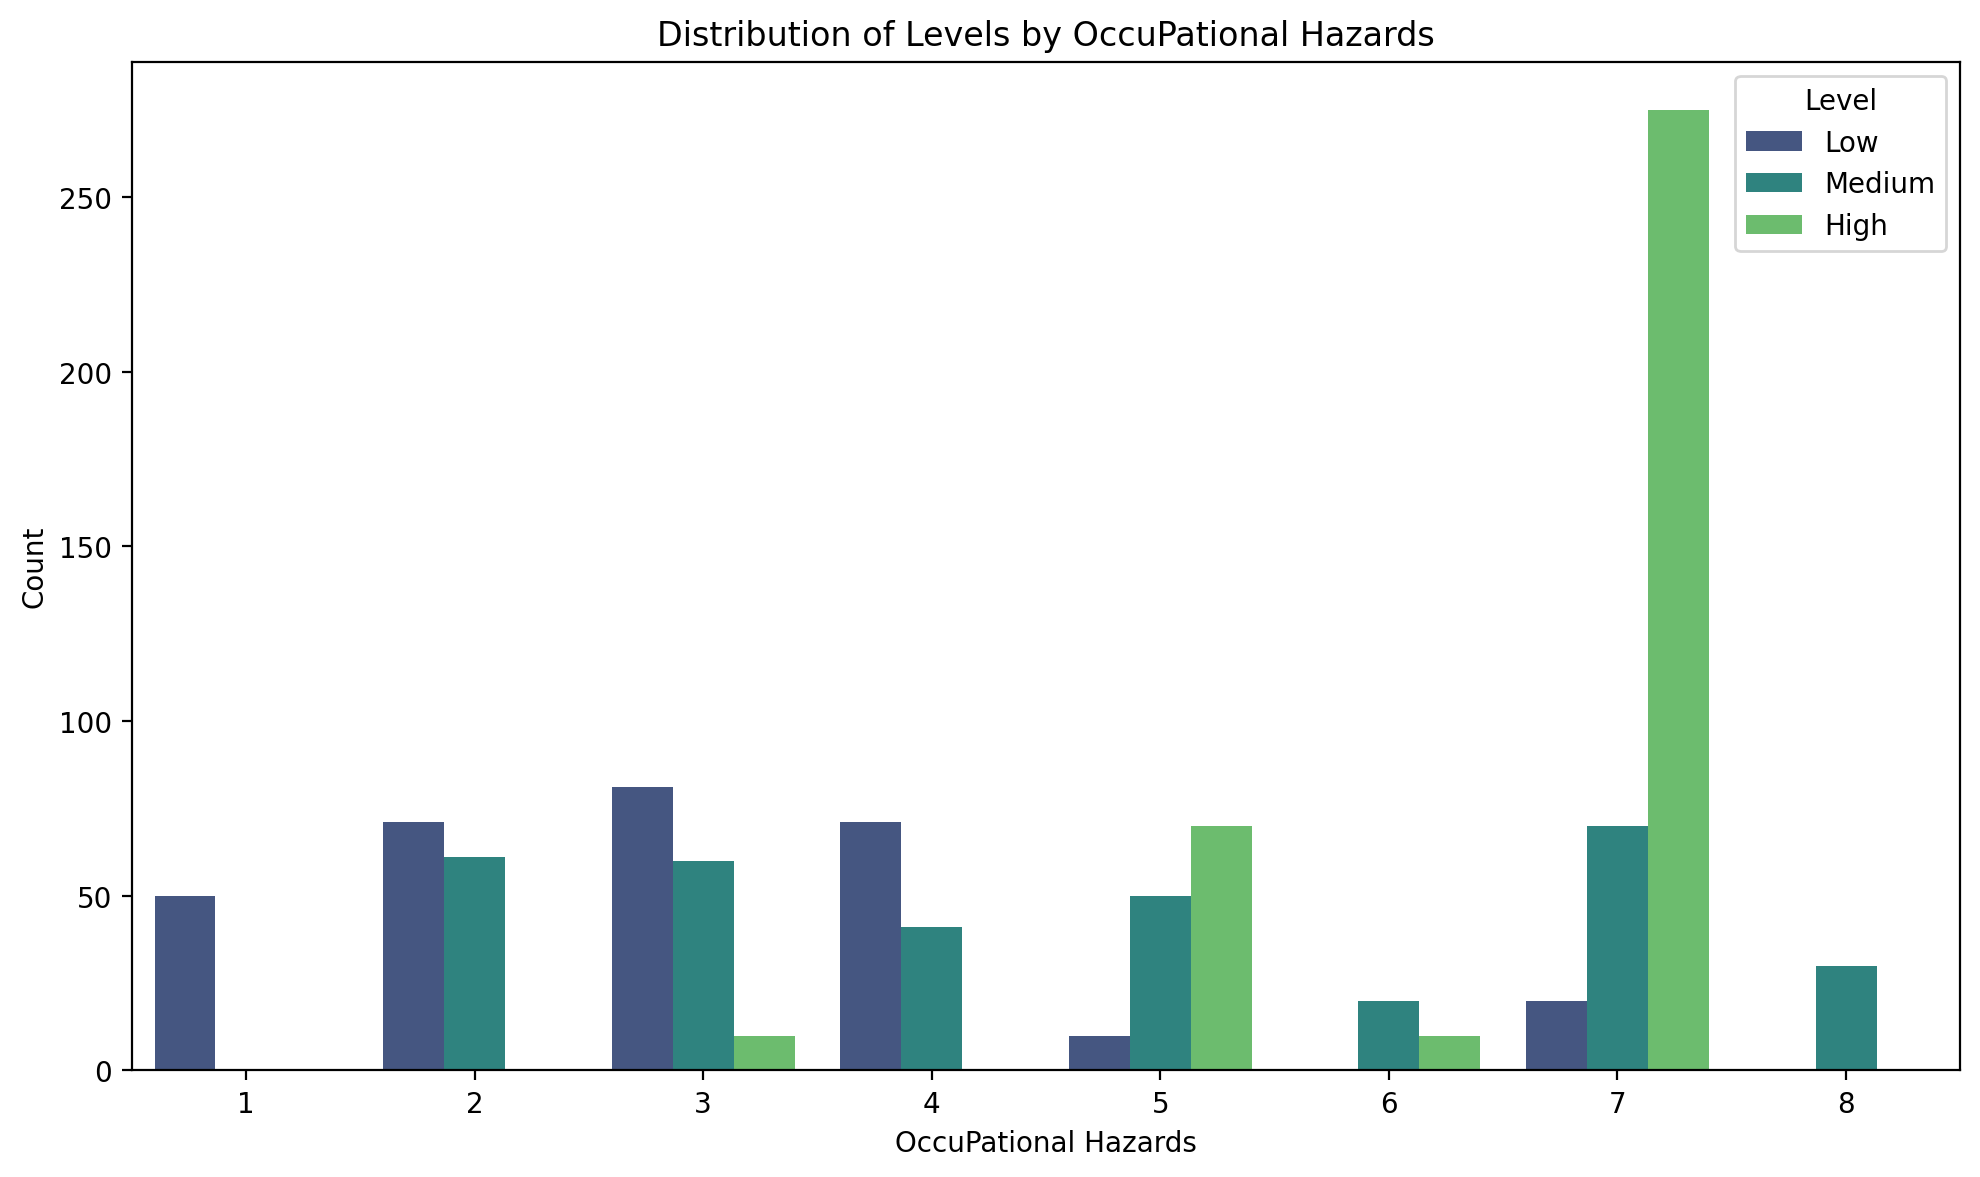

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='OccuPational Hazards', hue='Level', data=data, palette='viridis')
plt.title('Distribution of Levels by OccuPational Hazards')
plt.xlabel('OccuPational Hazards')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

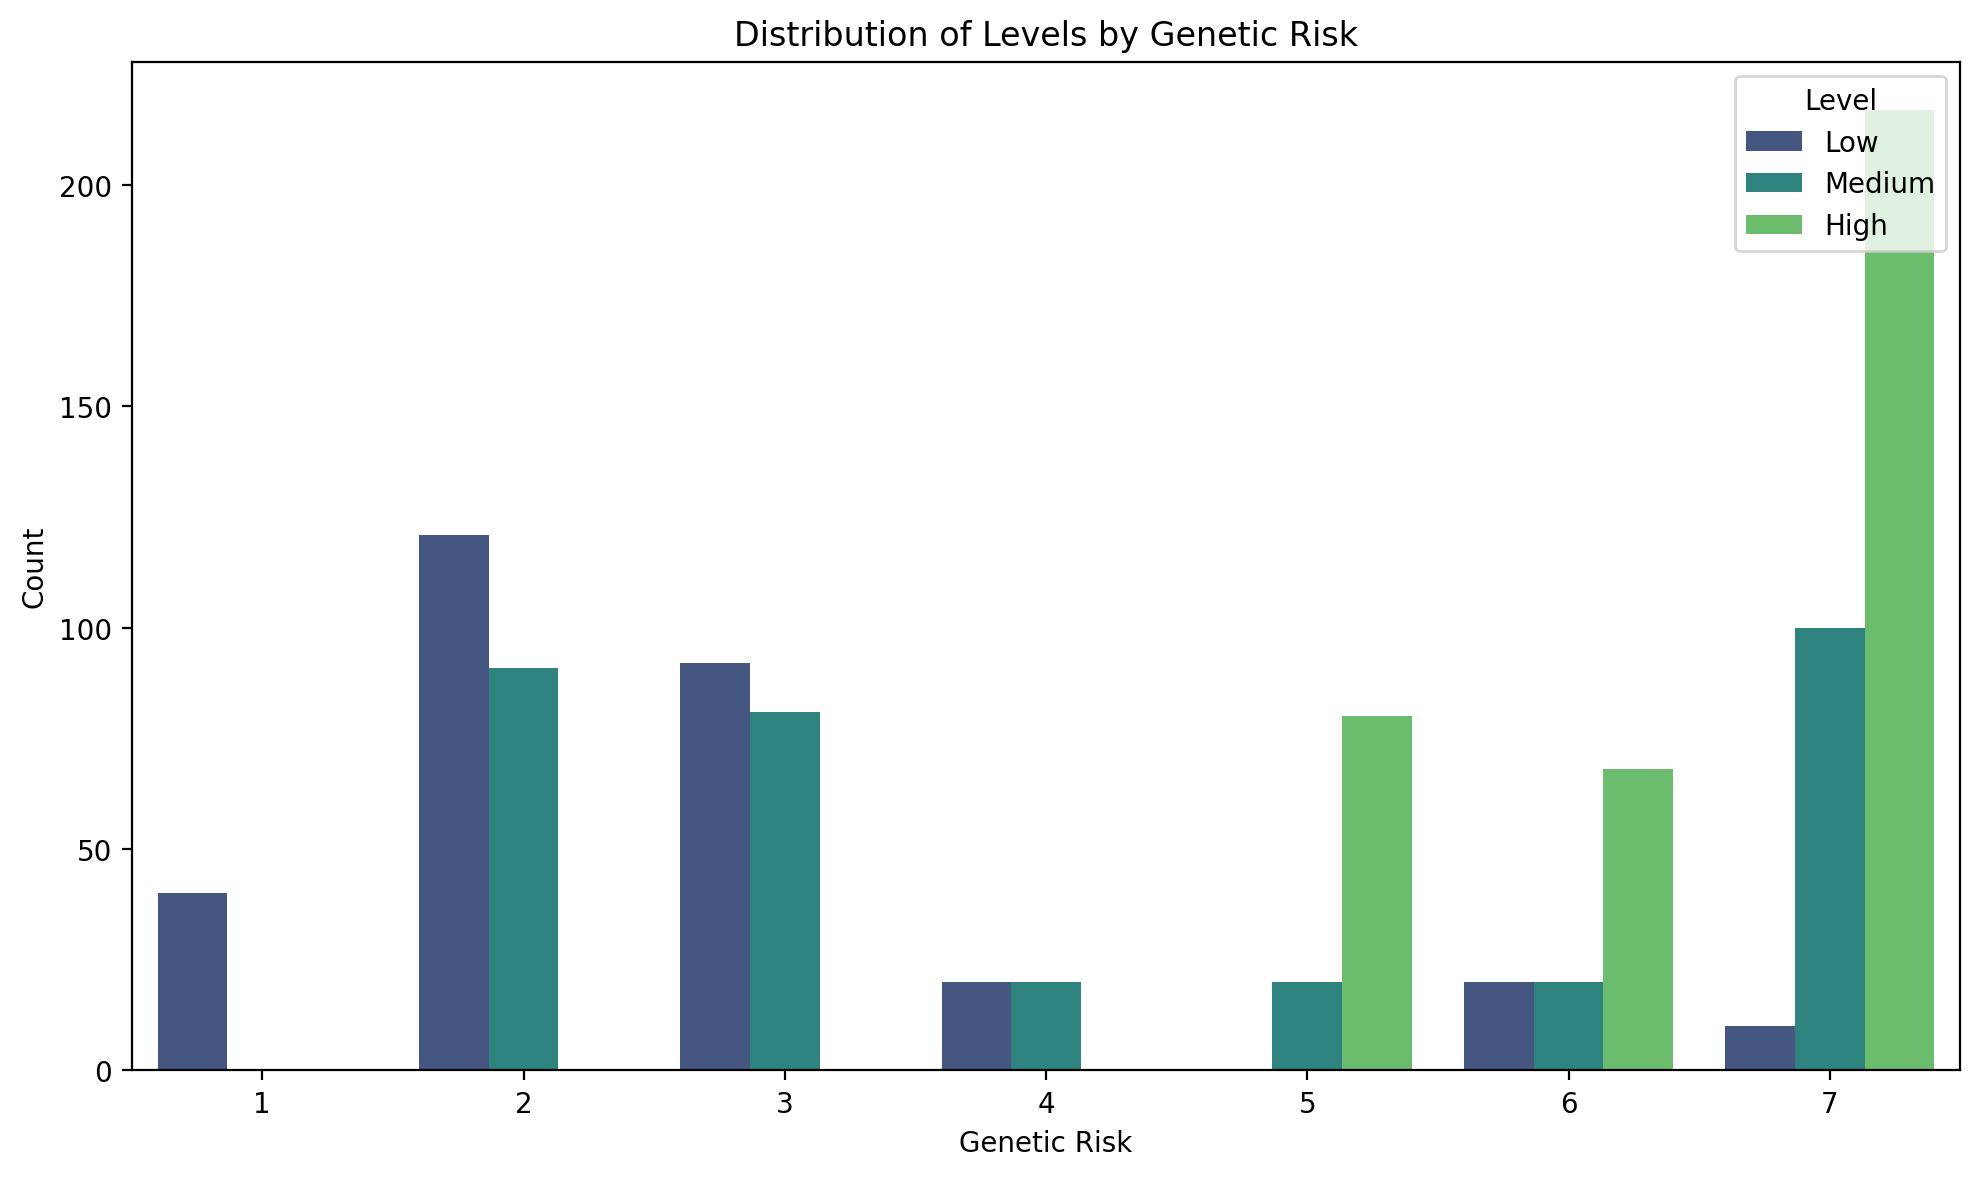

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Genetic Risk', hue='Level', data=data, palette='viridis')
plt.title('Distribution of Levels by Genetic Risk')
plt.xlabel('Genetic Risk')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

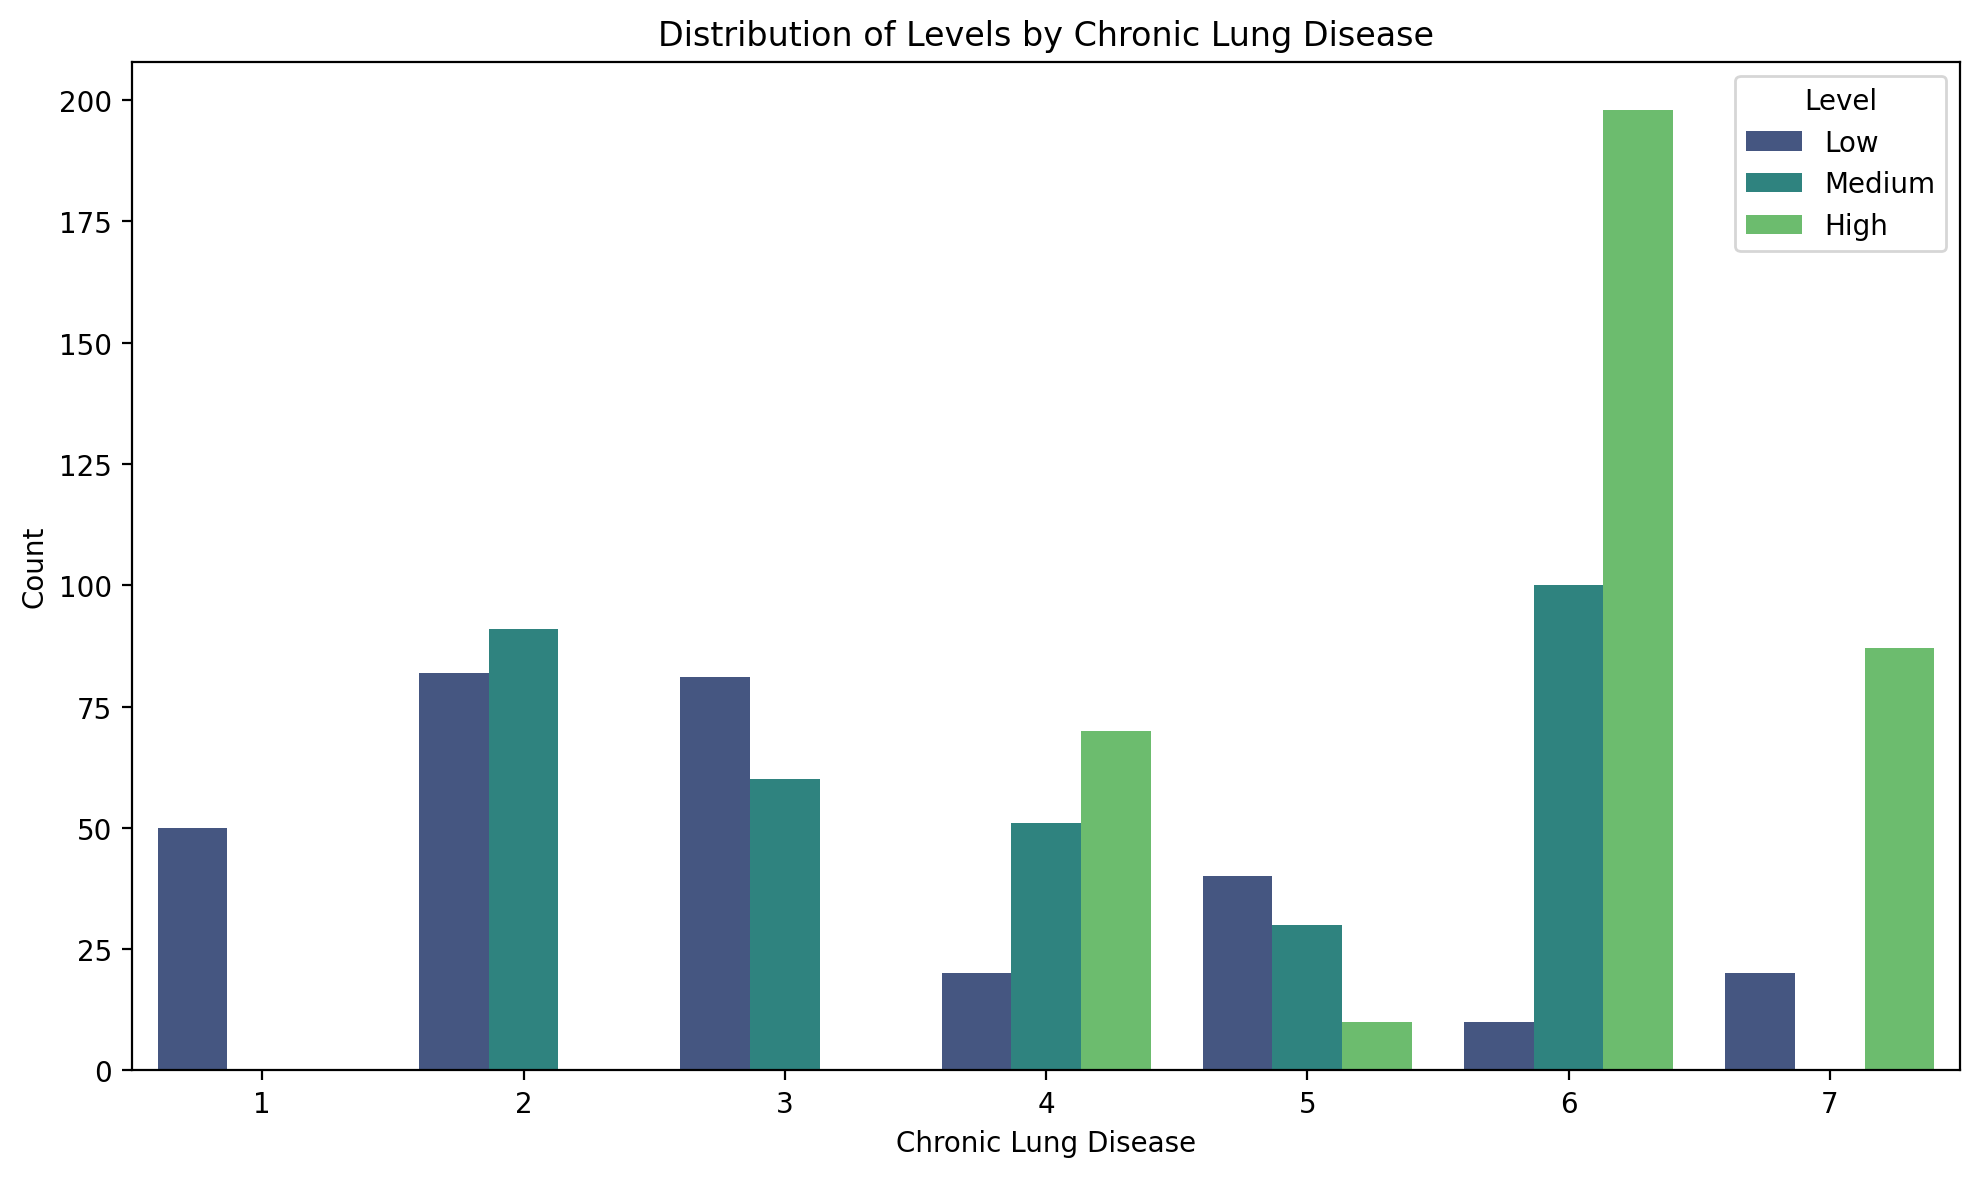

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x='chronic Lung Disease', hue='Level', data=data, palette='viridis')
plt.title('Distribution of Levels by Chronic Lung Disease')
plt.xlabel('Chronic Lung Disease')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

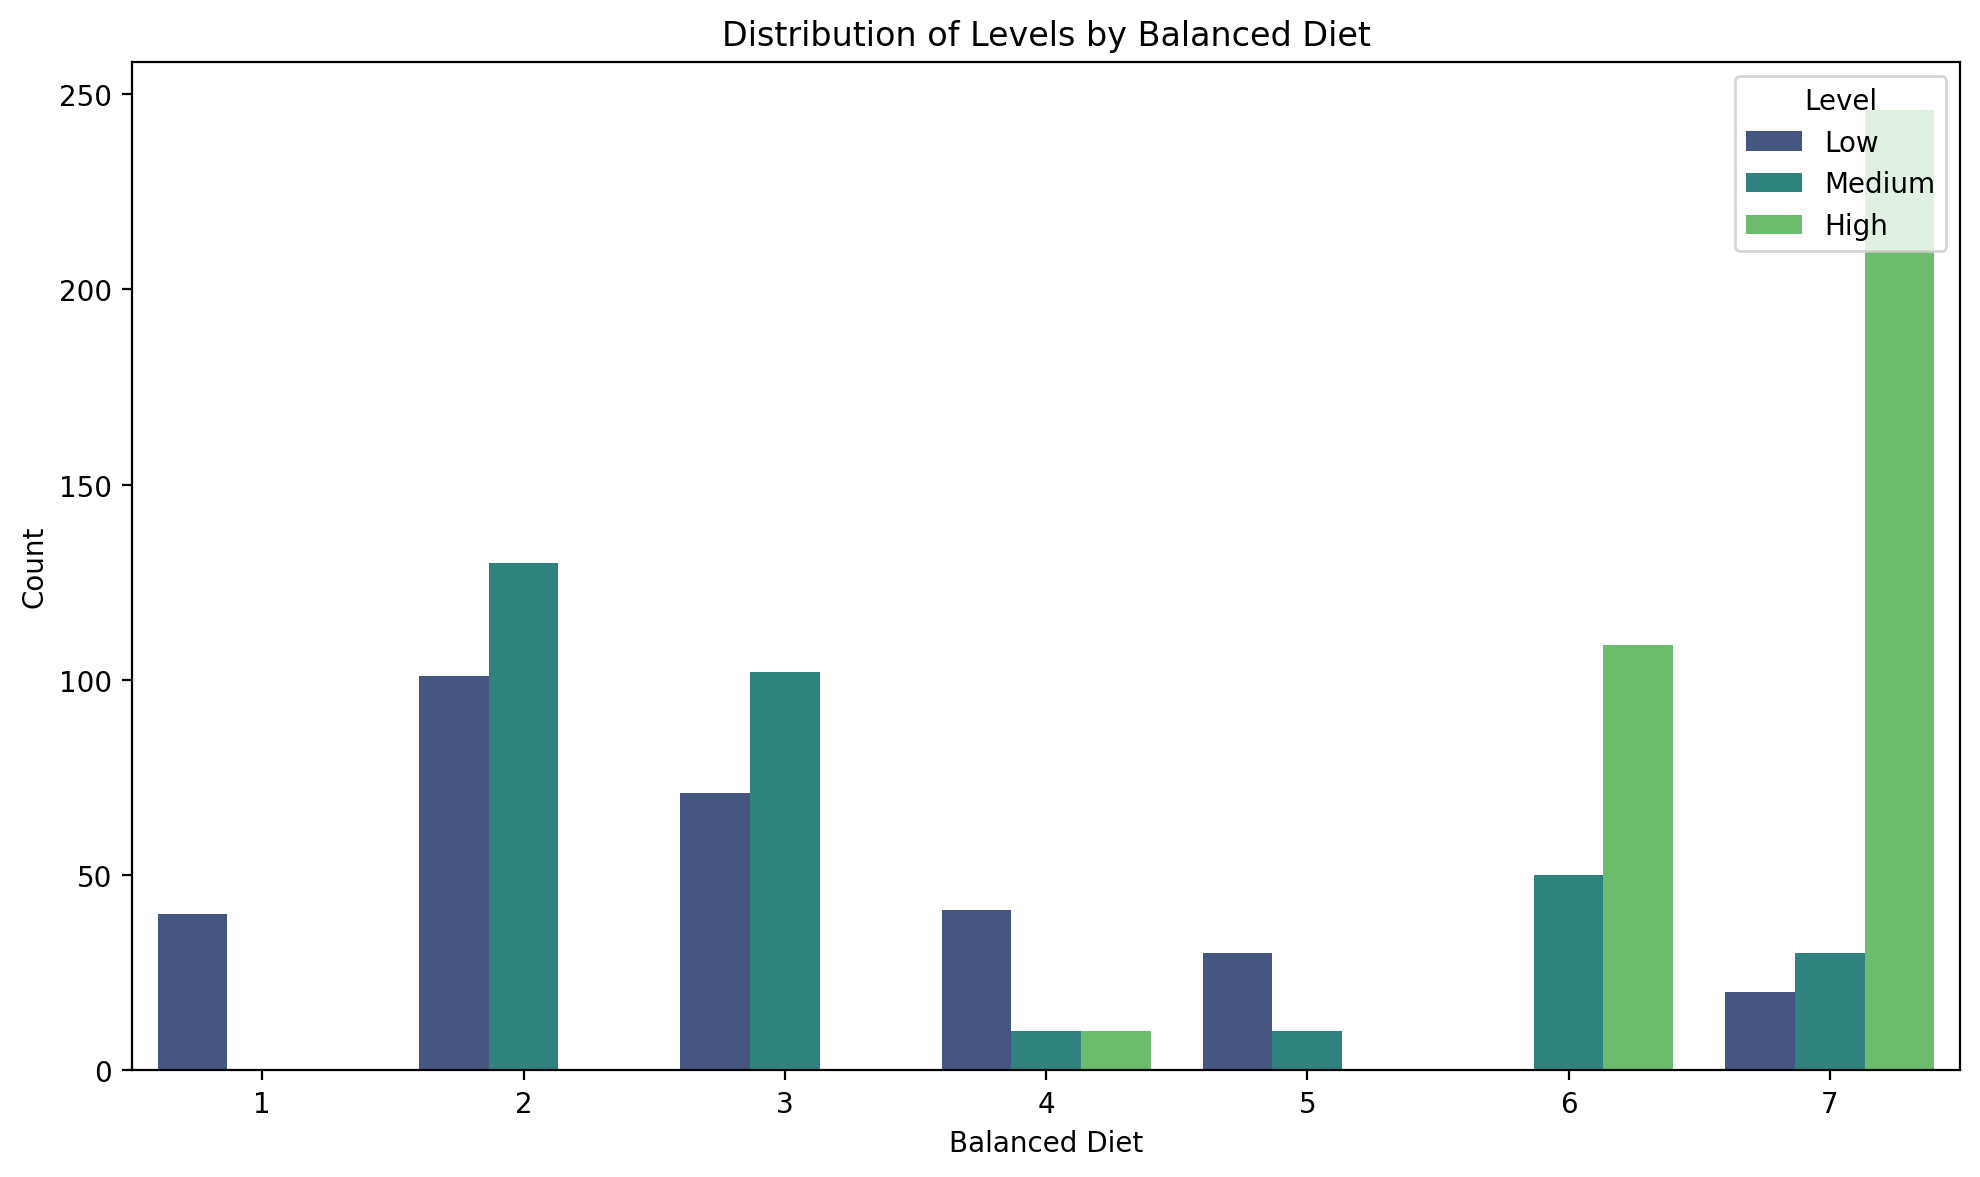

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Balanced Diet', hue='Level', data=data, palette='viridis')
plt.title('Distribution of Levels by Balanced Diet')
plt.xlabel('Balanced Diet')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

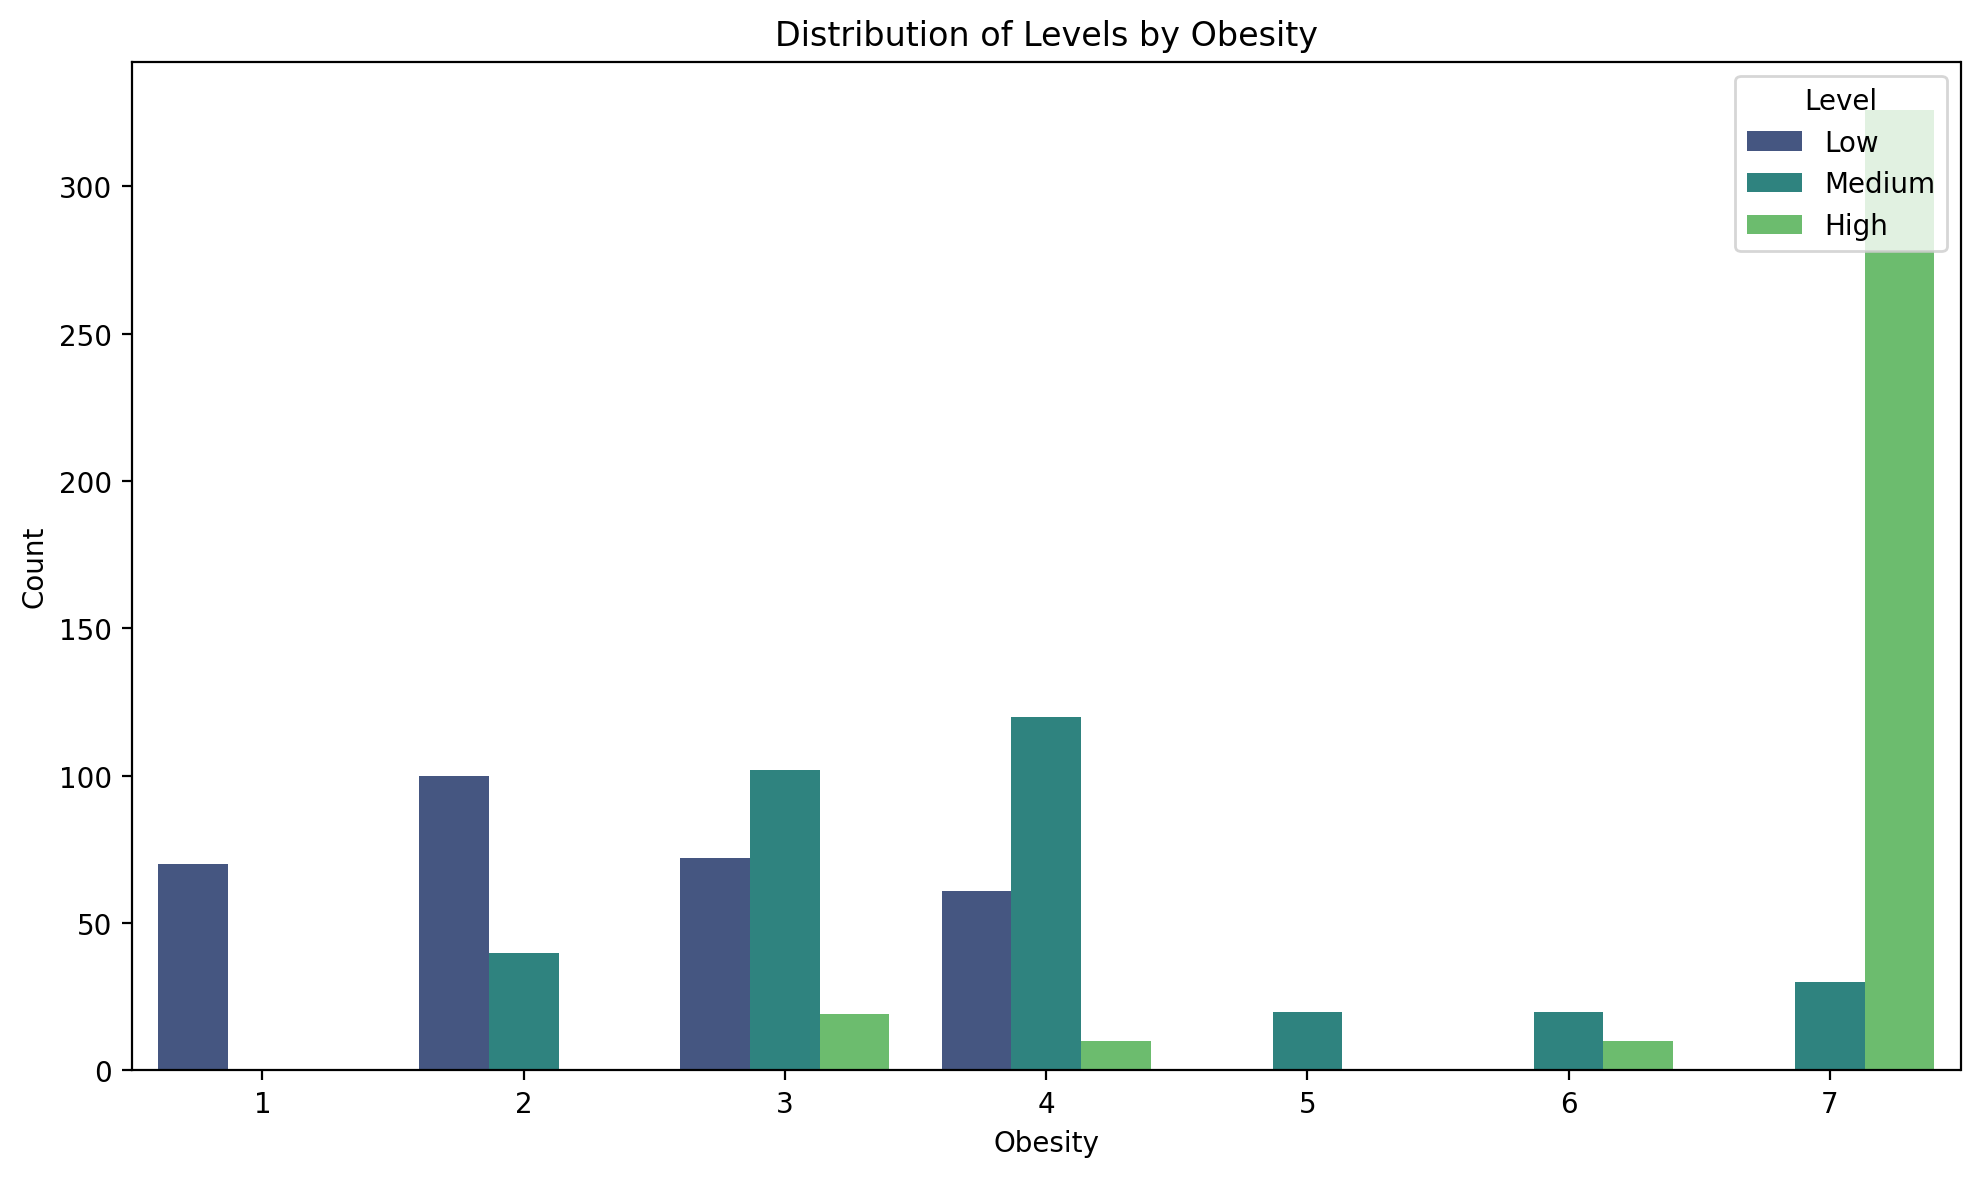

In [37]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Obesity', hue='Level', data=data, palette='viridis')
plt.title('Distribution of Levels by Obesity')
plt.xlabel('Obesity')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

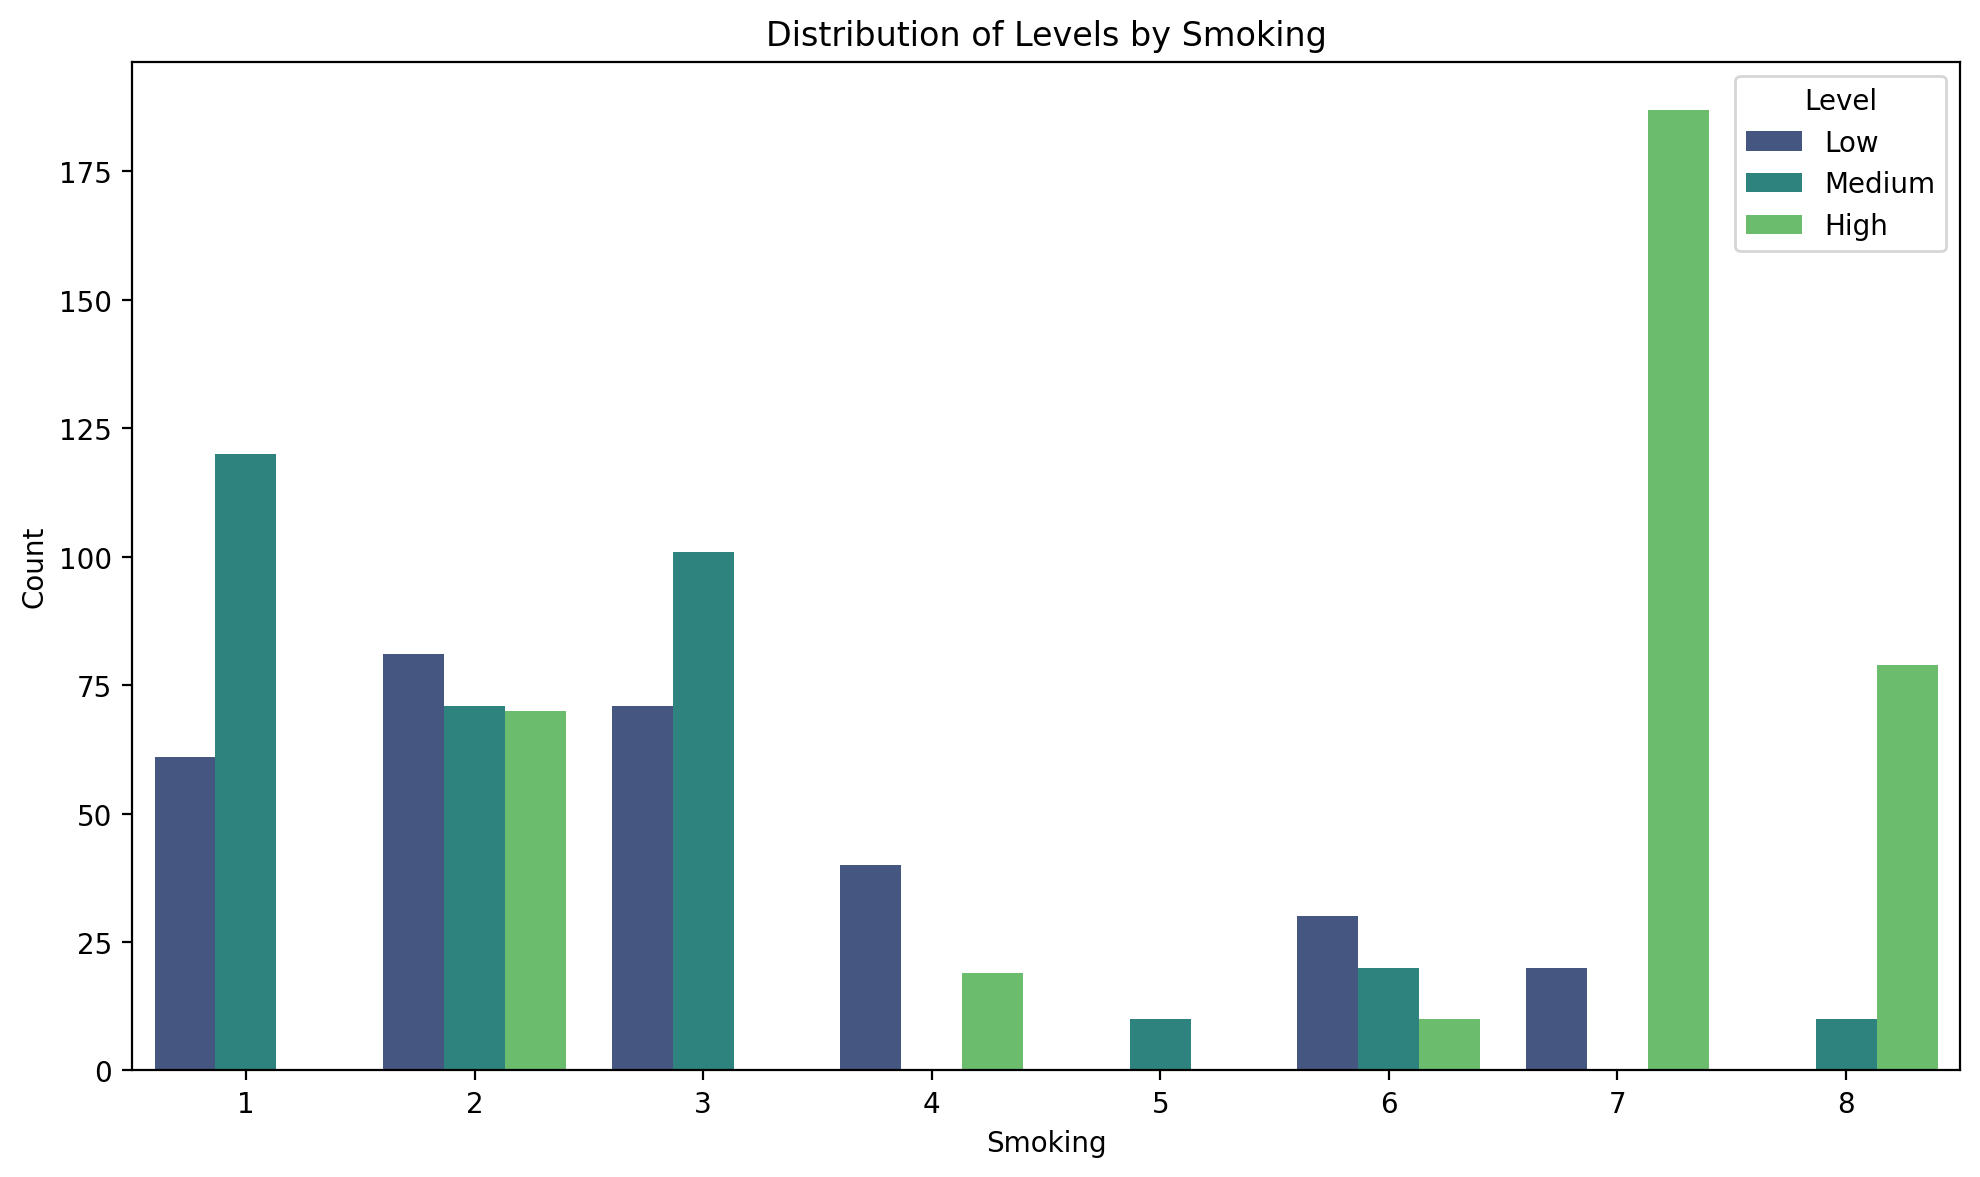

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Smoking', hue='Level', data=data, palette='viridis')
plt.title('Distribution of Levels by Smoking')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right')

plt.tight_layout()
plt.show()

# SKIP KE MODELING DULU YA :(

In [19]:
# Importing Necessary Libraries and Functions

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

from matplotlib.colors import ListedColormap

from scipy import stats
from scipy.stats import norm, skew

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler

%config InlineBackend.figure_format = 'retina'

In [20]:
data=data.drop(['Patient Id','Level'], axis=1)

KeyError: "['Patient Id'] not found in axis"

In [ ]:
X = data.drop(columns='Level_numeric')
y = data.Level_numeric

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
# Logistic Regression

logreg = LogisticRegression(C=24)

logreg.fit(X_train_scaled, y_train)

y_predict1 = logreg.predict(X_test_scaled)

In [ ]:
# Confusion Matrix

logreg_cm = confusion_matrix(y_test, y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax)
plt.title('Logistic Regression Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
print('\n')
plt.show()
print('\n')

In [ ]:
score_logreg = logreg.score(X_test_scaled, y_test)
print('Logistic Regression Score = ',score_logreg)

In [ ]:
# Logistic Regression

logreg = LogisticRegression(C=24)

logreg.fit(X_train_scaled, y_train)

y_predict1 = logreg.predict(X_test_scaled)

gajadi

In [ ]:
#  # prep
# from sklearn.linear_model import LinearRegression

# # Method for preprocessing
# def prep(df):

  categorical = ['Age',  'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring', 'Level']
  df_dummies_categorical = pd.get_dummies(data, columns = categorical_features)
  # df = pd.concat([df, categorical_features], axis=1)
  data=data.drop(columns=[categorical_features], axis=1)

  # return df

In [ ]:
data=prep(data)
data

In [ ]:
from sklearn.linear_model import LinearRegression

# Method for preprocessing
def prep(df):
  # Convert categorical ke variabel indikator
  df_dummies_age = pd.get_dummies(df['Age'],prefix='Age')
  df_dummies_gender = pd.get_dummies(df['Gender'],prefix='Gender')
  df_dummies_apollution = pd.get_dummies(df['Air Pollution'],prefix='Air Pollution')
  df_dummies_alcohol = pd.get_dummies(df['Alcohol use'], prefix='Alcohol use')
  df_dummies_dust = pd.get_dummies(df['Dust Allergy'], prefix='Dust Allergy')
  df_dummies_hazards = pd.get_dummies(df['OccuPational Hazards'],prefix='OccuPational Hazards')
  df_dummies_genetic = pd.get_dummies(df['Genetic Risk'],prefix='Genetic Risk')
  df_dummies_chronic = pd.get_dummies(df['chronic Lung Disease'],prefix='chronic Lung Disease')
  df_dummies_diet = pd.get_dummies(df['Balanced Diet'],prefix='Balanced Diet')
  df_dummies_obesity = pd.get_dummies(df['Obesity'],prefix='Obesity')
  df_dummies_smoking = pd.get_dummies(df['Smoking'],prefix='Smoking')
  df_dummies_passsmoker = pd.get_dummies(df['Passive Smoker'],prefix='Passive Smoker')
  df_dummies_chestpain = pd.get_dummies(df['Chest Pain'],prefix='Chest Pain')
  df_dummies_coughingblood = pd.get_dummies(df['Coughing of Blood'],prefix='Coughing of Blood')
  df_dummies_fatigue = pd.get_dummies(df['Fatigue'],prefix='Fatigue')
  df_dummies_wloss = pd.get_dummies(df['Weight Loss'],prefix='Weight Loss')
  df_dummies_shortnessbreath = pd.get_dummies(df['Shortness of Breath'],prefix='Shortness of Breath')
  df_dummies_wheezing = pd.get_dummies(df['Wheezing'],prefix='Wheezing')
  df_dummies_swallowingdiff = pd.get_dummies(df['Swallowing Difficulty'],prefix='Swallowing Difficulty')
  df_dummies_clubbingfingers = pd.get_dummies(df['Clubbing of Finger Nails'],prefix='Clubbing of Finger Nails')
  df_dummies_cold = pd.get_dummies(df['Frequent Cold'],prefix='Frequent Cold')
  df_dummies_drycough = pd.get_dummies(df['Dry Cough'],prefix='Dry Cough')
  df_dummies_snoring = pd.get_dummies(df['Snoring'],prefix='Snoring')
  # df_dummies_level = pd.get_dummies(df['Level'],prefix='Level')

  # Menggabungkan DataFrame asli dengan DataFrame hasil get_dummies
  df = pd.concat([df, df_dummies_age, df_dummies_gender, df_dummies_apollution, df_dummies_alcohol, df_dummies_dust, df_dummies_hazards, df_dummies_genetic, df_dummies_chronic, df_dummies_diet, df_dummies_obesity,
                  df_dummies_smoking, df_dummies_passsmoker, df_dummies_chestpain, df_dummies_coughingblood, df_dummies_fatigue, df_dummies_wloss, df_dummies_shortnessbreath, df_dummies_wheezing, df_dummies_swallowingdiff,
                  df_dummies_clubbingfingers, df_dummies_cold, df_dummies_drycough, df_dummies_snoring,], axis=1)

  # Hapus kolom yang sudah di convert
  df.drop(columns=['Age',  'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring'], axis=1, inplace=True)

  return df

In [ ]:
data=prep(data)
data

In [ ]:
data.isnull().sum()

In [ ]:
data.info()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
ss = StandardScaler()
scaled_data = ss.fit_transform(data)
standarized_data = pd.DataFrame(scaled_data, index = data.index, columns = data.columns)
print(standarized_data.shape)
standarized_data.head()

In [ ]:
# Split feature and target
X = data.drop('Level_numeric', axis = 1)
y = data['Level_numeric']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [ ]:
# feature selection
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=f_classif, k='all')
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# pengecekan skor pada setiap feature
for i in range(len(fs.scores_)):
 print('%s: %f' % (X.columns[i], fs.scores_[i]))

# visualisasi skor
df_fs = pd.DataFrame({'Feature':X.columns, 'Importance':fs.scores_}).sort_values('Importance', ascending=False)
plt.figure(figsize=(12,8))
barplot_fi = sns.barplot(data=df_fs, x='Importance', y='Feature', palette="inferno")